# Vzorové využití analýzy systémů amoniaku s různým počtem molekul

- Pracuji se 46 systémy molekul amoniaku a elektronu zároveň a je potřeba je analyzovat úplně stejně.
- Rozdíl systémů je pouze v počtu molekul a nebo v různé trajektorii, proto jsem se rozhodl udělat OOP verzi dané analýzy.
- Analýza je zatím vytvořena specificky pro molekuly amoniaku se solvatovaným elektronem, ale značná část kódu má po úpravě využití v molekulové dynamice malých molekul, zejména dynamiky prováděny v CP2K a dalších programů využívající Ab-initio molekulovu dynamiku

## Načítání třídy a datasetu, který obsahuje všechna ID systémů i počet molekul

In [1]:
from oop_cluster_copy import AmmoniaCluster
from data_set_key import data_set

## Převedení ID systémů do listu

In [19]:
systems = []
for i in data_set.keys():
    systems.append(i)

len(systems) # počet systémů

# LM: hezčí?
systems == list(data_set.keys()) == [key for key in data_set]

True

## Vytvoření slovníku, kde ID systému je klíč a hodnota je instance třídy AmmoniaCluster

In [25]:
ammonia_systems = {}
for _, system in enumerate(systems):
    ammonia_systems[system] = AmmoniaCluster(system)

# LM: proč enumerate? 
a_s = {}
for key in systems:
    a_s[key] = AmmoniaCluster(system)
# LM: nebo ještě rychleji
a_s = {key: AmmoniaCluster(key) for key in systems}

# LM: a nebo úplně nejlépe:
a_s = {key: AmmoniaCluster(key) for key in data_set}

# Základní info o systému - 3 příklady
print(ammonia_systems[21])
print(ammonia_systems[51])
print(ammonia_systems[481])

ID of cluster: 21, Number of ammonia: 2, Folder: None
ID of cluster: 51, Number of ammonia: 5, Folder: None
ID of cluster: 481, Number of ammonia: 48, Folder: None


### Práce s jednotlivýmí systémy - zatím pouze konkrétní systém, ale následuje úprava pro všechny systémy, ale nejdřív jsem to chtěl udělat zkušebně pro jeden (analyzovaná data jsou velká)

Systém s ID 21

In [4]:
print(ammonia_systems[21]) # "folder" bude sloužit jako cesta pro kořenovou složku daného systému
print(AmmoniaCluster(21)) # LM: Je opravdu v pořádku tady znovu volat konstruktor?

ID of cluster: 21, Number of ammonia: 2, Folder: None
ID of cluster: 21, Number of ammonia: 2, Folder: None


ID systému jako int, string a ziskani jeho počtu molekul

In [5]:
int_id, id, number_of_ammonia = ammonia_systems[21].get_value_from_key()

# Výpis hodnot a jejich typu
print("Počet molekul jako int: \t", int_id, "\t", type(int_id))
print("Počet molekul jako string: \t", id, "\t", type(id))
print("Číslo systému: \t\t\t", number_of_ammonia, "\t", type(number_of_ammonia))


Počet molekul jako int: 	 2 	 <class 'int'>
Počet molekul jako string: 	 02 	 <class 'str'>
Číslo systému: 			 1 	 <class 'int'>


Vytváří bash restart soubor, který restartuje výpočet, když doběhne a restartuje to do určitého datumu - na metodě se pracuje (bude to práce se vzorovým restart souborem)

In [6]:
ammonia_systems[21].make_bash()

'This method makes SH input for 21'

Vizualizace radiální distribuční funkce (RDF) - v plánu je vytvořit OOP metodu, která bude počítat RDF přímo ve třídě a ne v jiném souboru.

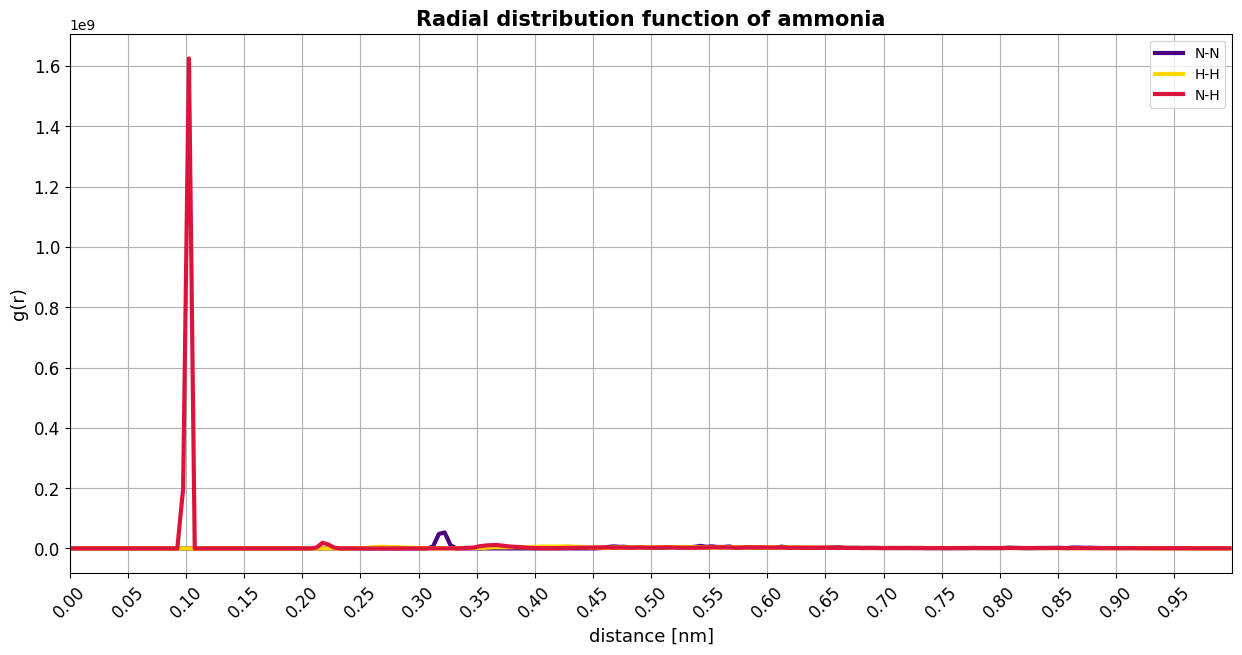

In [7]:
ammonia_systems[21].plot_rdf()

Kontrola LOG souboru, jestli výpočet doběhl správně

In [8]:
ammonia_systems[21].control_logs()

'This method control LOG file of 21'

Průměrný čas výpočtu na jeden výpočetní krok

In [9]:
ammonia_systems[21].average_used_time()

Average time per step is 52.77 s


Interaktivní graf různych hodnot z průbehu simulace - dodělat (plotly?)

In [10]:
ammonia_systems[21].graph_ener()

'This method makes interactive plot for 21'

4 důležité grafy v jednom - asi trochu změnit konfiguraci vizualizace

Generated in:
	Thu Apr 20 14:25:36 2023


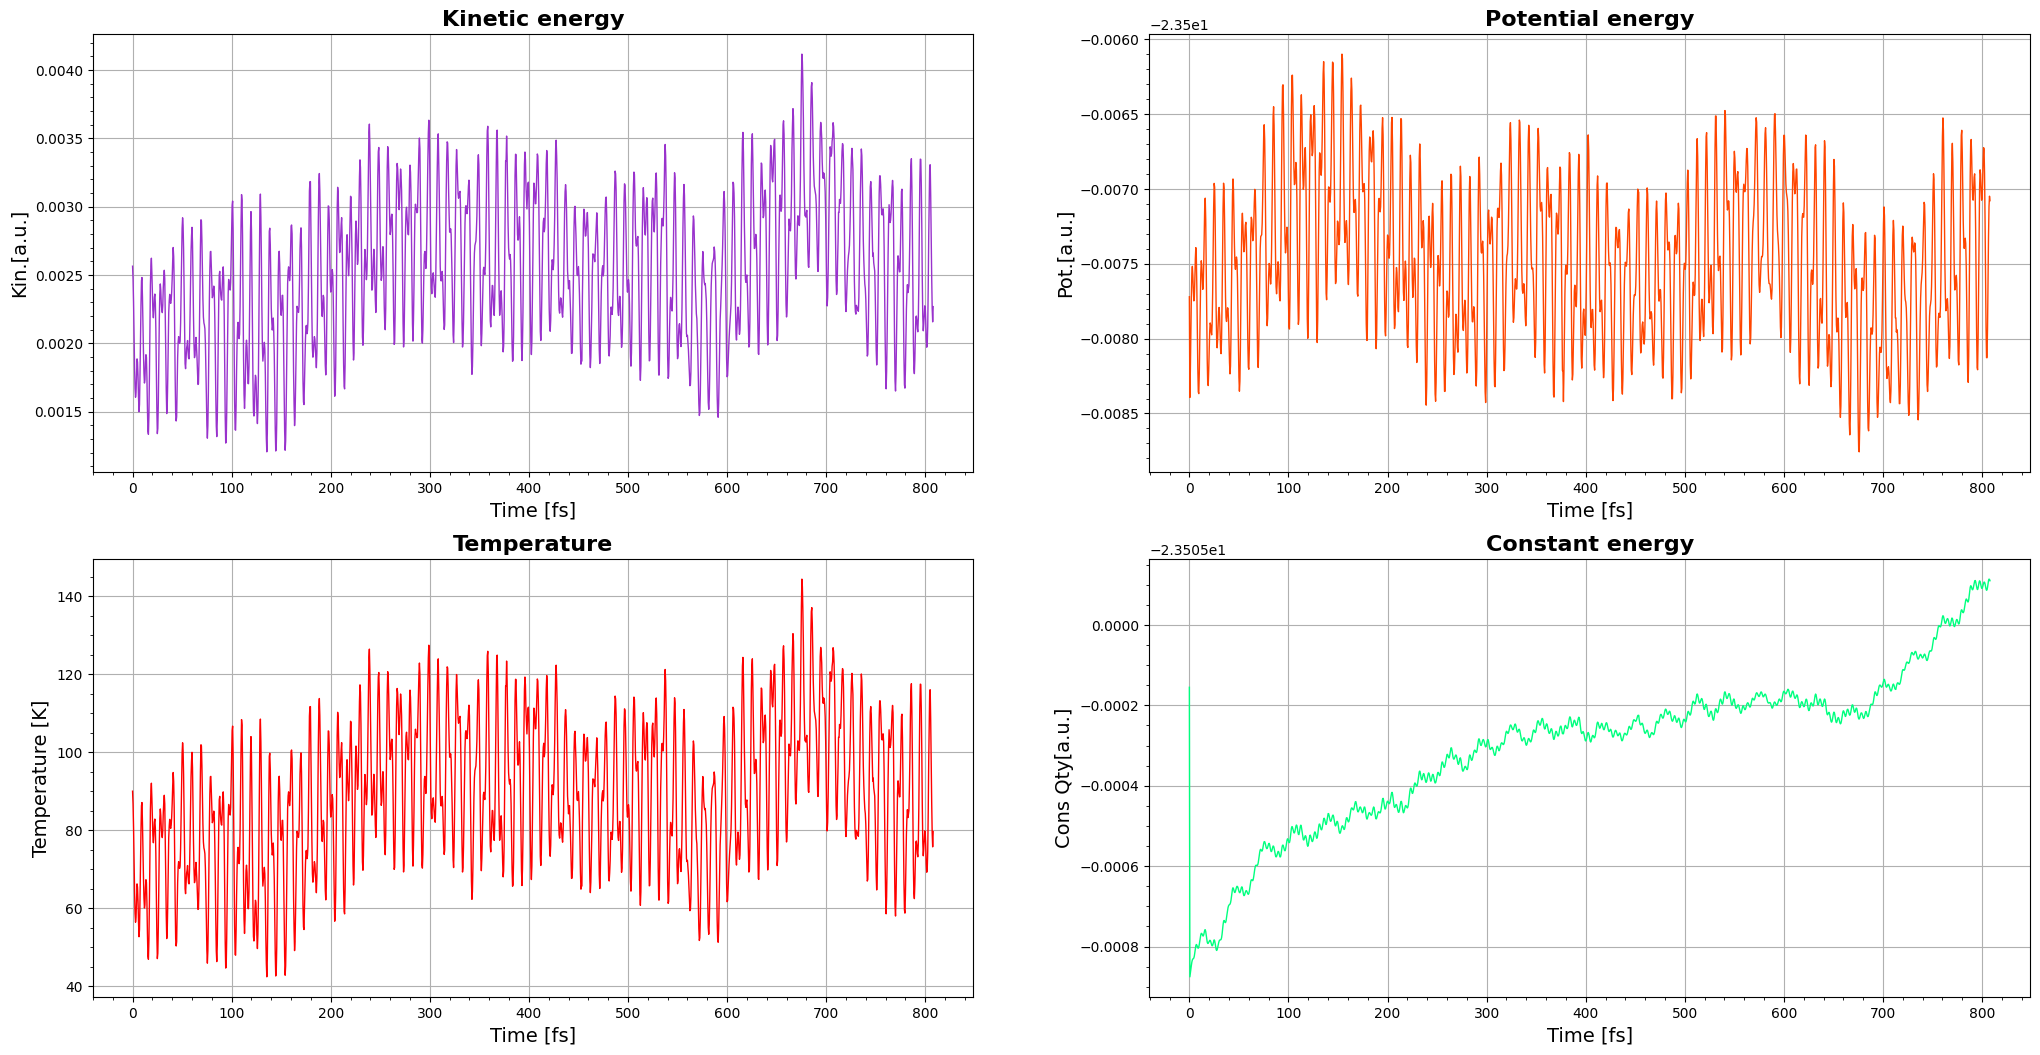

In [11]:
ammonia_systems[21].four_plots_in_one() # je zde i datum generování

Vytváří INPUT soubor do programu CP2K - je to potřeba dodělat do částečně OOP verze

In [12]:
AmmoniaCluster.cp2k_input(project_name="SMALL_CLUSTERS_21",
                            box_size= 20, input_name="ammonia-02-1.inp",
                            temperature= 190, cubes_list= 9, total_atoms= 1008,
                            charge= -1, multiplicity=2, walltime= 3600,
                            periodic="NONE", restart_input= False)

Vytváří ghost XYZ soubor s atom gridem - stačí implementace do OOP verze

In [13]:
ammonia_systems[21].make_grid()

'This method makes XYZ file with ghost atoms for 21'

Krájí trajektorii po určitém kroku a po určitou délku trajektorie a každou část trajektorie uloží zvlášť do XYZ souboru s číslem snímku - udělat OOP verzi

In [14]:
ammonia_systems[21].slice_traj()

'Slicing 21'

Čte informace z TXT souboru/databáze pro daný systém - ke každému systému budou uloženy důležité informace, které pak lze číst dle potřeby

In [15]:
ammonia_systems[21].get_properties()

'Properties computing of 21 system from TXT file or DB'

Zobrazí CUBE file s elektronovou hustotou volného elektronu - musím dodělat OOP verzi a to, aby jsem si mohl vybrat, od kolikátého snímku a kolikáteho snímku to chci vizualizovat

In [16]:
ammonia_systems[21].show_cube()

'This showing cube file for 21'